In [103]:
import sys
sys.path.append("..")
from library import *

In [104]:
def get_rand_hermitian(n):
    shape = (n, n)
    U = np.random.uniform(-1, 1, shape) + 1.j * np.random.uniform(-1, 1, shape)
    return np.tril(U, -1) + np.tril(U, -1).conj().T + np.diag(np.random.uniform(-1, 1, n))

def get_image_data(ham, m_values, tau_values):
    # ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

    # m_values = np.linspace(1, 10, 200)
    # tau_values = np.linspace(1/100, 15 / ham_norm, 200)
    # print(m_values[-1], tau_values[-1]*herm_norm)

    data = np.zeros(shape=(len(m_values), len(tau_values)))
    for itau, tau in enumerate(tau_values):
        ite = get_ite(ham, tau)
        for im, m in enumerate(m_values):
            strott = get_trotter_S(ham, tau, m)
            fid = get_fidelity(ite, strott)

            error = 1 - fid
            data[len(m_values) - 1 - im, itau] = error
        print(f"Step {itau+1}/{len(tau_values)} done!")
    return data

In [105]:
ham = get_rand_hermitian(n=64)
ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

m_values = np.linspace(1, 10, 100)
tau_values = np.linspace(1/100, 15 / ham_norm, 100)
print(m_values[-1], tau_values[-1] * ham_norm)

data = get_image_data(ham, m_values, tau_values)

10.0 14.999999999999998
Step 1/100 done!
Step 2/100 done!
Step 3/100 done!
Step 4/100 done!
Step 5/100 done!
Step 6/100 done!
Step 7/100 done!
Step 8/100 done!
Step 9/100 done!
Step 10/100 done!
Step 11/100 done!
Step 12/100 done!
Step 13/100 done!
Step 14/100 done!
Step 15/100 done!
Step 16/100 done!
Step 17/100 done!
Step 18/100 done!
Step 19/100 done!
Step 20/100 done!
Step 21/100 done!
Step 22/100 done!
Step 23/100 done!
Step 24/100 done!
Step 25/100 done!
Step 26/100 done!
Step 27/100 done!
Step 28/100 done!
Step 29/100 done!
Step 30/100 done!
Step 31/100 done!
Step 32/100 done!
Step 33/100 done!
Step 34/100 done!
Step 35/100 done!
Step 36/100 done!
Step 37/100 done!
Step 38/100 done!
Step 39/100 done!
Step 40/100 done!
Step 41/100 done!
Step 42/100 done!
Step 43/100 done!
Step 44/100 done!
Step 45/100 done!
Step 46/100 done!
Step 47/100 done!
Step 48/100 done!
Step 49/100 done!
Step 50/100 done!
Step 51/100 done!
Step 52/100 done!
Step 53/100 done!
Step 54/100 done!
Step 55/100 d

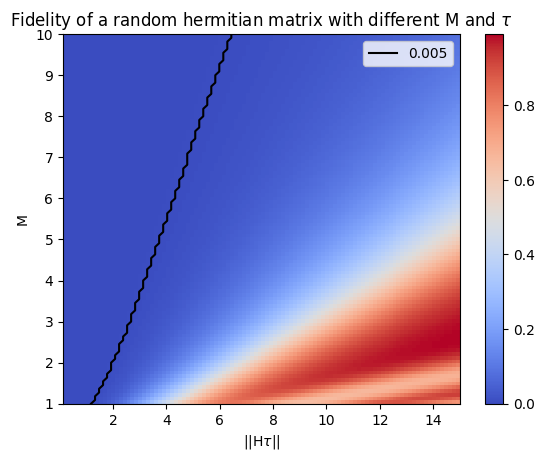

In [109]:
extent = [tau_values[0]*ham_norm, tau_values[-1]*ham_norm, m_values[0], m_values[-1]]
fig, ax = plt.subplots()
im = ax.imshow(data, interpolation='nearest', extent=extent, aspect="auto", cmap='coolwarm')
cbar = fig.colorbar(im, ax=ax)

threshold = 0.005
indexes = np.argmax(data > threshold, axis=1)

plt.xlabel(r"||H$\tau$||")
plt.ylabel("M")
plt.plot(tau_values[indexes]*ham_norm, m_values[::-1], color="black", label=str(threshold))
plt.legend()
plt.title(r"Fidelity of a random hermitian matrix with different M and $\tau$");
# plt.plot(np.arange(1, 10), np.arange(1, 19, 2))